In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

def sample_bimodal_gaussian_split(
    mu1: float, sigma1: float,
    mu2: float, sigma2: float,
    size: int = 1,
    weight: float = 0.5
) -> np.ndarray:
    """
    Generate random samples from a bimodal Gaussian (mixture of two Gaussians).

    Args:
        mu1 (float): Mean of the first Gaussian.
        sigma1 (float): Std dev of the first Gaussian.
        mu2 (float): Mean of the second Gaussian.
        sigma2 (float): Std dev of the second Gaussian.
        weight (float): Probability of sampling from the first Gaussian (0 to 1).
        size (int): Number of samples to generate.

    Returns:
        np.ndarray: Array of random samples from the bimodal distribution.
    """
    choices = np.random.rand(size) < weight
    samples_lo = np.empty(np.sum(choices))
    samples_hi = np.empty(np.sum(~choices))

    samples_lo = np.random.normal(mu1, sigma1, np.sum(choices))
    samples_hi = np.random.normal(mu2, sigma2, np.sum(~choices))

    samples_lo[samples_lo < 0] = 0
    samples_hi[samples_hi < 0] = 0

    return samples_lo, samples_hi 

def sample_bimodal_gaussian(
    mu1: float, sigma1: float,
    mu2: float, sigma2: float,
    size: int = 1,
    weight: float = 0.5
) -> np.ndarray:
    """
    Generate random samples from a bimodal Gaussian (mixture of two Gaussians).

    Args:
        mu1 (float): Mean of the first Gaussian.
        sigma1 (float): Std dev of the first Gaussian.
        mu2 (float): Mean of the second Gaussian.
        sigma2 (float): Std dev of the second Gaussian.
        weight (float): Probability of sampling from the first Gaussian (0 to 1).
        size (int): Number of samples to generate.

    Returns:
        np.ndarray: Array of random samples from the bimodal distribution.
    """
    choices = np.random.rand(size) < weight
    samples = np.empty(size)
    samples[choices] = np.random.normal(mu1, sigma1, np.sum(choices))
    samples[~choices] = np.random.normal(mu2, sigma2, np.sum(~choices))
    samples[samples < 0] = 0
    return samples 

def sample_bimodal_gaussian2D(
    mu1: np.array, sigma1: np.array,
    mu2: np.array, sigma2: np.array,
    size: int = 1,
    weight: float = 0.5
) -> np.ndarray:
    """
    Generate random samples from a bimodal Gaussian (mixture of two Gaussians).

    Args:
        mu1 (float): Mean of the first Gaussian.
        sigma1 (float): Std dev of the first Gaussian.
        mu2 (float): Mean of the second Gaussian.
        sigma2 (float): Std dev of the second Gaussian.
        weight (float): Probability of sampling from the first Gaussian (0 to 1).
        size (int): Number of samples to generate.

    Returns:
        np.ndarray: Array of random samples from the bimodal distribution.
    """
    choices = np.random.rand(size) < weight
    samples0 = np.empty(size)
    samples0[choices] = np.random.normal(mu1[0], sigma1[0], np.sum(choices))
    samples0[~choices] = np.random.normal(mu2[0], sigma2[0], np.sum(~choices))
    samples0[samples0 < 0] = 0

    samples1 = np.empty(size)
    samples1[choices] = np.random.normal(mu1[1], sigma1[1], np.sum(choices))
    samples1[~choices] = np.random.normal(mu2[1], sigma2[1], np.sum(~choices))
    samples1[samples1 < 0] = 0
    return samples0, samples1

def correlated_2d_normal(mean, cov, size=10000):
    """
    Generate and plot a correlated 2D normal distribution.

    Args:
        mean (list): Means for each dimension [mean_x, mean_y].
        cov (list of lists): Covariance matrix [[var_x, cov_xy], [cov_yx, var_y]].
        num_samples (int): Number of samples to generate.
        bins (int): Number of bins for the 2D histogram.
        cmap (str): Colormap for the heatmap.

    Returns:
        t1_samples (np.ndarray): Samples for the first variable.
        t2_samples (np.ndarray): Samples for the second variable.
    """
    samples = np.random.multivariate_normal(mean, cov, size)
    t1_samples = samples[:, 0]
    t2_samples = samples[:, 1]

    return t1_samples, t2_samples

def double_correlated_2d_normal(mean1, cov1, mean2, cov2, size=1, weight=0.5):
    """
    Generate and plot two correlated 2D normal distributions.

    Args:
        mean1, mean2: Means for each distribution [mean_x, mean_y].
        cov1, cov2: Covariance matrices for each distribution.
        num_samples: Number of samples for each distribution.
        bins: Number of bins for the 2D histogram.
        cmap: Colormap for the heatmap.

    Returns:
        (t1a, t2a), (t1b, t2b): Samples for both distributions.
    """
    choices = np.random.rand(size) < weight
    t1a, t2a = correlated_2d_normal(mean1, cov1, np.sum(choices))
    t1b, t2b = correlated_2d_normal(mean2, cov2, np.sum(choices))
    return np.concatenate([t1a,t1b]), np.concatenate([t2a,t2b])

def select_periodic(T_Hi, T_Lo, hr, size, time):
    """
    Select random items from T_Hi or T_Lo based on a periodic function with period hr.

    Args:
        T_Hi (np.ndarray): Array of high values.
        T_Lo (np.ndarray): Array of low values.
        hr (float): Period of the function (in same units as index).
        size (int): Number of items to select.
        phase (float): Optional phase offset (default 0).

    Returns:
        np.ndarray: Selected values, length=size.
    """
    tline = np.linspace(0,time,size)
    # Use a sine function to alternate selection
    selector = (np.sin(2 * np.pi * (tline / hr)) > 0)
    # Randomly select from T_Hi or T_Lo
    hi_choices = np.random.choice(T_Hi, size)
    lo_choices = np.random.choice(T_Lo, size)
    result = np.where(selector, hi_choices, lo_choices)
    return result, tline

def select_periodicCorr(T_HiA, T_LoA, T_HiB, T_LoB, hr, size, time):
    """
    Select random items from T_Hi or T_Lo based on a periodic function with period hr.

    Args:
        T_Hi (np.ndarray): Array of high values.
        T_Lo (np.ndarray): Array of low values.
        hr (float): Period of the function (in same units as index).
        size (int): Number of items to select.
        phase (float): Optional phase offset (default 0).

    Returns:
        np.ndarray: Selected values, length=size.
    """
    tline = np.linspace(0,time,size)
    # Use a sine function to alternate selection
    selector = (np.sin(2 * np.pi * (tline / hr)) > 0)
    # Randomly select from T_Hi or T_Lo
    #T_Lo = list(zip(T_LoA,T_LoB))
    #T_Hi = list(zip(T_HiA,T_HiB))
    #hi_choices = np.random.choice(T_Hi, size)
    #lo_choices = np.random.choice(T_Lo, size)

    T_Lo = np.column_stack((T_LoA, T_LoB))
    T_Hi = np.column_stack((T_HiA, T_HiB))
    hi_idx = np.random.choice(len(T_Hi), size)
    lo_idx = np.random.choice(len(T_Lo), size)
    hi_choices = T_Hi[hi_idx]
    lo_choices = T_Lo[lo_idx]

    result = np.where(selector[:, None], hi_choices, lo_choices)
    return result, tline

def make_t2(t1, tphi):
    """
    Calculate T2 given T1 (array) and Tphi (float).
    1/T2 = 1/(2*T1) + 1/Tphi

    Args:
        t1 (np.ndarray): Array of T1 values.
        tphi (float): Tphi value.

    Returns:
        np.ndarray: Array of T2 values.
    """
    a = 1 / (2 * t1)
    b = 1 / tphi
    return 1 / (a + b)

# Throw Q A T1

In [ ]:
# V1
#mean1 = [50, 50]  # Means for T1 and T2
#cov1 = [[250, 200],  # Covariance matrix: diagonal = variances, off-diagonal = correlation
#       [200, 250]]
#mean2 = [160, 190]  # Means for T1 and T2
#cov2 = [[300, 200],  # Covariance matrix: diagonal = variances, off-diagonal = correlation
#       [200, 300]]

# V2 weaker tls
mean1 = [120, 120]  # Means for T1 and T2
#cov1 = [[250, 150],  # Covariance matrix: diagonal = variances, off-diagonal = correlation
#       [150, 250]]
cov1 = [[20, 150],  # Covariance matrix: diagonal = variances, off-diagonal = correlation
       [150, 20]]
mean2 = [160, 190]  # Means for T1 and T2
cov2 = [[300, 200],  # Covariance matrix: diagonal = variances, off-diagonal = correlation
       [200, 300]]

T1_A_SAMPLE, T2_A_SAMPLE = double_correlated_2d_normal(mean1, cov1, mean2, cov2, size=5000)

# Create 2D histogram (heatmap)
plt.figure(figsize=(8, 6))
plt.hist2d(T1_A_SAMPLE, T2_A_SAMPLE, bins=50, cmap='viridis')
#plt.contour(sample0, sample1, bins=50, cmap='viridis')
plt.xlabel("T1")
plt.ylabel("T2")
plt.colorbar(label='Counts')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go

# Example data
x = T1_A_SAMPLE_HI
y = T2_A_SAMPLE_HI

fig = go.Figure()

# 2D contour
fig.add_trace(go.Histogram2dContour(
    x=x, y=y,
    colorscale='Viridis',
    contours=dict(showlines=False),
    ncontours=20,
    showscale=True
))

# X projection (top)
fig.add_trace(go.Histogram(
    x=x, yaxis='y2',
    marker=dict(color='rgba(0,0,150,0.5)'),
    nbinsx=50,
    showlegend=False
))

# Y projection (right)
fig.add_trace(go.Histogram(
    y=y, xaxis='x2',
    marker=dict(color='rgba(150,0,0,0.5)'),
    nbinsy=50,
    showlegend=False
))

# Layout for projections
fig.update_layout(
    xaxis=dict(domain=[0, 0.85]),
    yaxis=dict(domain=[0, 0.85]),
    xaxis2=dict(domain=[0.85, 1], showticklabels=False),
    yaxis2=dict(domain=[0.85, 1], showticklabels=False),
    bargap=0.05,
    width=700,
    height=700,
)

fig.show()

In [ ]:
T1_A_SAMPLE_LO, T2_A_SAMPLE_LO = correlated_2d_normal(mean1, cov1, size=200)
T1_A_SAMPLE_HI, T2_A_SAMPLE_HI = correlated_2d_normal(mean2, cov2, size=200)


In [ ]:
print( make_t2(np.array([1,2,3]),10) ) 

In [ ]:
#T1_A_SAMPLE_LO, T2_A_SAMPLE_LO = correlated_2d_normal(mean1, cov1, size=1000)
#T1_A_SAMPLE_HI, T2_A_SAMPLE_HI = correlated_2d_normal(mean2, cov2, size=1000)

#T1_A_SAMPLE_LO, T1_A_SAMPLE_HI = sample_bimodal_gaussian_split(50e-6,10e-6,170e-6,10e-6,200) #b1
T1_A_SAMPLE_LO, T1_A_SAMPLE_HI = sample_bimodal_gaussian_split(120e-6,10e-6,170e-6,10e-6,200) #b2

T2_A_SAMPLE_LO = make_t2(T1_A_SAMPLE_LO, 350e-6) # or 220
T2_A_SAMPLE_HI = make_t2(T1_A_SAMPLE_HI, 350e-6)



# Create 2D histogram (heatmap)
plt.figure(figsize=(8, 6))
plt.hist2d(np.concatenate([T1_A_SAMPLE_LO,T1_A_SAMPLE_HI])*1e6, np.concatenate([T2_A_SAMPLE_LO,T2_A_SAMPLE_HI])*1e6, bins=50, cmap='viridis')
#plt.hist2d(T2_A_SAMPLE_HI*1e6, T1_A_SAMPLE_HI*1e6, bins=50, cmap='viridis')
#plt.contour(sample0, sample1, bins=50, cmap='viridis')
plt.xlabel("T1")
plt.ylabel("T2")
plt.colorbar(label='Counts')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

#T1_A_SAMPLE_LO, T1_A_SAMPLE_HI = sample_bimodal_gaussian_split(120e-6,10e-6,170e-6,10e-6,500)

# Drawn from PDF
plt.figure(figsize=(8, 5))
plt.hist(np.concatenate([T1_A_SAMPLE_LO,T1_A_SAMPLE_HI])*1e6, bins=100, alpha=0.7, color='steelblue', edgecolor='black')
#plt.hist(T1_A_SAMPLE_HI*1e6, bins=100, alpha=0.7, color='steelblue', edgecolor='black')

plt.xlabel("us")
plt.ylabel("Count")
plt.title("T1")
plt.grid(True)
plt.show()

## with ZZ coupling

In [ ]:

# Two-qubit simultaneous-Ramsey with ZZ coupling + T1/T2
# ---------------------------------------------------------------
import numpy as np, qutip as qt, matplotlib.pyplot as plt
from datetime import datetime

for j in range(0,10):
    print(f"Job: {j}")
    name_hint = ""
    chi_MHz = 0.0
    T1_A_SAMPLE = []
    T2_A_SAMPLE = []

    ver_str = "tp350b2_05s201p_re"

    if j==0: # lo 10mhz
        name_hint="lo_10mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.01
    if j==1: # hi 10mhz
        name_hint="hi_10mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.01
    if j==2: # lo 0mhz
        name_hint="lo_0mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.0
    if j==3: # hi 0mhz
        name_hint="hi_0mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.0
    if j==4: # lo 100mhz
        name_hint="lo_100mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.1
    if j==5: # hi 100mhz
        name_hint="hi_100mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.1    
    if j==6: # lo 300mhz
        name_hint="lo_300mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.3
    if j==7: # hi 300mhz
        name_hint="hi_300mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.3
    if j==8: # lo 50mhz
        name_hint="lo_50mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_LO
        T2_A_SAMPLE=T2_A_SAMPLE_LO
        chi_MHz = 0.05
    if j==9: # hi 50mhz
        name_hint="hi_50mhz"
        T1_A_SAMPLE=T1_A_SAMPLE_HI
        T2_A_SAMPLE=T2_A_SAMPLE_HI
        chi_MHz = 0.05

    expA_list = []
    expB_list = []
    counter = 0 

    for i in range(len(T1_A_SAMPLE)):
        iT1_A = T1_A_SAMPLE[i]
        IT2_A = T2_A_SAMPLE[i]
        if counter%10==0:
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            print(f'loop: {counter} time: {timestamp}')
        counter+=1

        #fA = iQ_A #3.000e9          # qubit bare freqs  (Hz)
        #fA = 3.000e9          # qubit bare freqs  (Hz)
        #fB = 3.040e9        
        fA = 3.440e9          # qubit bare freqs  (Hz) id as "re" type
        fB = 3.330e9
        detA = detB = 3e6         # 3         # Ramsey detuning   (Hz)
        #chi_MHz     = #0.6 #0.6                   # ZZ  (MHz)  (0 → no beating)

        #T1_A = 110e-6 # iQ_A 
        T1_A = iT1_A 
        T1_B = 170e-6                 # T1  (s)
        T2_A = IT2_A                  # average?
        T2_B = 190e-6                 # desired T2 (s)

        #t_ns = np.linspace(0, 5000, 401)    # free-evolution delays (ns)
        #t_ns = np.linspace(0, 10000, 401)    # free-evolution delays (ns)
        #t_ns = np.linspace(0, 100000, 150)    # free-evolution delays (ns)
        #t_ns = np.linspace(0, 10000, 101)
        t_ns = np.linspace(0, 5000, 201)

        wA,wB   = 2*np.pi*np.array([fA,fB])
        chi     = 2*np.pi*chi_MHz*1e6
        EdA,EdB = 0.01*wA, 0.01*wB          # Rabi → τπ/2≈8 ns
        pi2A,pi2B = np.pi/(2*EdA), np.pi/(2*EdB)
        tau_p   = float(max(pi2A,pi2B))

        I,sx,sz,sm = qt.qeye(2),qt.sigmax(),qt.sigmaz(),qt.destroy(2)
        sxA,sxB = qt.tensor(sx,I), qt.tensor(I,sx)
        szA,szB = qt.tensor(sz,I), qt.tensor(I,sz)
        smA,smB = qt.tensor(sm,I), qt.tensor(I,sm)
        nA,nB   = qt.tensor(qt.num(2),I),   qt.tensor(I,qt.num(2))

        # ─── Collapse operators for given T1 and T2 ─────────────────
        def collapse_ops(T1,T2,sm_op,sz_op):
            g1  = 1/T1
            gphi = max(0, 1/T2 - g1/2)      # 1/T2 = 1/(2T1)+1/Tphi
            return [np.sqrt(g1)*sm_op, np.sqrt(0.5*gphi)*sz_op] # need 0.5?

        c_ops = ( collapse_ops(T1_A,T2_A,smA,szA) +
                  collapse_ops(T1_B,T2_B,smB,szB) )

        # ─── Static Hamiltonian ───────────────────────────
        H0 = 0.5*wA*szA + 0.5*wB*szB + chi/4*szA*szB
        def gate_coeff(ω,amp,t0,t1):
            return lambda t,args=None: amp*np.cos(ω*t) if t0<=t<t1 else 0.0

        def H_sequence(delay_s):
            t1s,t1e = 0.0,        pi2A
            t2s,t2e = tau_p,      tau_p+pi2A
            return [H0,
                    [sxA, gate_coeff(wA+2*np.pi*detA, EdA, t1s, t1e)],
                    [sxB, gate_coeff(wB+2*np.pi*detB, EdB, t1s, pi2B)],
                    [sxA, gate_coeff(wA+2*np.pi*detA, EdA, t2s+delay_s, t2e+delay_s)],
                    [sxB, gate_coeff(wB+2*np.pi*detB, EdB, t2s+delay_s, pi2B+tau_p+delay_s)]], \
                   2*tau_p + delay_s

        # ───  Ramsey point (single integration) ──────────────────────
        opts = qt.Options(nsteps=20000, store_final_state=True, atol=1e-7, rtol=1e-6)
        psi_g = qt.tensor(qt.basis(2,0), qt.basis(2,0))

        def ramsey(delay_ns):
            τ = delay_ns*1e-9
            H,t_tot = H_sequence(τ)
            tlist = np.linspace(0,t_tot,int(t_tot/2e-9)+1)  # 2-ns solver step
            st = qt.mesolve(H, psi_g, tlist, c_ops, e_ops=[], options=opts).states[-1]
            return qt.expect(nA,st), qt.expect(nB,st)

        expA,expB = np.array(qt.parallel_map(ramsey,t_ns,progress_bar=False, map_kw={"num_cpus":90})).T
        #expA,expB = np.array([ramsey(t) for t in t_ns]).T

        expA_list.append(expA)
        expB_list.append(expB)    

    # write to file
    # Create a timestamp string
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Create filename
    filename = f"results_t1_{name_hint}_{ver_str}_t1t2XX_{timestamp}_gphi.npz"

    # Save the lists to a compressed npz file
    np.savez(filename, expA_list=expA_list, expB_list=expB_list, T1_A_SAMPLE=T1_A_SAMPLE, T2_A_SAMPLE=T2_A_SAMPLE, t_ns=t_ns)

    print(f"Saved results to {filename}")


In [ ]:
def load_from_file(filename):
    # filename = "results_t1_10khz_YYYYMMDD_HHMMSS.npz"

    # Load the data
    data = np.load(filename)

    # Access arrays by their keys
    return data["expA_list"], data["expB_list"], data["T1_A_SAMPLE"]

a0,b0,l0 = load_from_file('results_t1_10khz_20250721_122335.npz')
a1,b1,l1 = load_from_file('results_t1_10khz_20250721_124533.npz')
a2,b2,l2 = load_from_file('results_t1_10khz_20250721_133343.npz')

expA_list= np.concatenate([a0, a1, a2])
expB_list= np.concatenate([b0, b1, b2])
T1_A_SAMPLE= np.concatenate([l0, l1, l2])

t_ns = np.linspace(0, 5000, 401)    # free-evolution delays (ns)

#
expA_list,expB_list,T1_A_SAMPLE = load_from_file('results_t1_10khz_t1t2XX_20250723_141101.npz')

# results_t1_0khz_20250721_172845 150 evt 
# results_t1_10khz_t2a170_20250722_170445 150 evt
# results_t1_10khz_t1t2XX_20250723_141101
# results_t1_10khz_t1t2XX_20250723_154839_gphi
# results_t1_600khz_t1t2XX_20250723_164919_gphi

expA_list1,expB_list1,T1_A_SAMPLE1 = load_from_file('results_t1_lo_600mhz_t1t2XX_20250724_024421_gphi.npz')
expA_list2,expB_list2,T1_A_SAMPLE2 = load_from_file('results_t1_hi_600mhz_t1t2XX_20250724_044908_gphi.npz')
expA_list= np.concatenate([expA_list1, expA_list2])
expB_list= np.concatenate([expB_list1, expB_list2])
T1_A_SAMPLE= np.concatenate([T1_A_SAMPLE1, T1_A_SAMPLE2])



In [ ]:
expA = expA_list[0]
expB = expB_list[0]
    
# ───  Plot ───────────────────────────────────────────────────
plt.figure(figsize=(20,4))
plt.subplot(121); plt.plot(t_ns/1000,expA,'.-'); plt.title('Qubit A'); plt.xlabel('delay (µs)'); plt.ylabel('P(e)')
plt.subplot(122); plt.plot(t_ns/1000,expB,'.-'); plt.title('Qubit B'); plt.xlabel('delay (µs)')
plt.suptitle(f'detuning = {detA/1e6:.1f} MHz   χ = {chi_MHz:.1f} MHz\nT1={T1_A*1e6:.0f} µs  T2={T2_A*1e6:.0f} µs')
plt.tight_layout(); plt.show()

## FIT with one amplitude
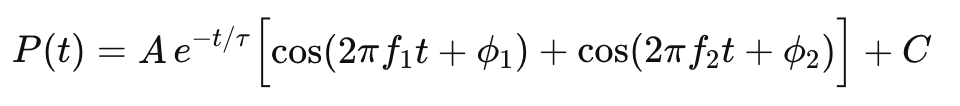

In [ ]:
# ==================================================================
# Fit Ramsey beating to two decaying cosines  (requires SciPy ≥1.6)
# ==================================================================
import numpy as np, matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import rfftfreq, rfft

# --- model --------------------------------------------------------
def double_cos(t_s, A, f1, f2, phi1, phi2, T2, C):
    env = A * np.exp(-t_s / T2)
    return env * (np.cos(2*np.pi*f1*t_s + phi1) +
                  np.cos(2*np.pi*f2*t_s + phi2)) + C

def single_cos(t_s, A, f1, f2, phi1, phi2, T2, C):
    env = A * np.exp(-t_s / T2)
    return env * np.cos(2*np.pi*f1*t_s + phi1) + C

# --- helper: crude initial guesses from FFT ----------------------
def guess_params(t_ns, y):
    t_s = t_ns*1e-9
    C0  = y.mean()
    A0  = 0.5*(y.max()-y.min())
    fs  = rfftfreq(len(t_s), t_s[1]-t_s[0])
    spec= np.abs(rfft(y-C0))
    peak_idx = spec.argsort()[-2:][::-1]   # two largest peaks
    f1, f2 = fs[peak_idx]
    return [A0, f1, f2, 0, 0, 20e-6, C0] # 5e-6

# --- report -------------------------------------------------------
def report(label, p):
    print(f"{label}:  f1 = {p[1]/1e6:.3f} MHz   f2 = {p[2]/1e6:.3f} MHz   "
          f"T2 = {p[5]*1e6:.1f} µs")
    
expA_t2 = []
expB_t2 = []
expA_p = []
expB_p = []

for expA, expB in zip(expA_list, expB_list):
    # --- fit both qubits ---------------------------------------------
    p0A = guess_params(t_ns, expA)
    p0B = guess_params(t_ns, expB)
    t_s = t_ns*1e-9

    bounds = ([0,0,0,-np.pi,-np.pi,0,0],
              [1,20e6,20e6,np.pi,np.pi,1e-3,1])

    pA,_ = curve_fit(double_cos, t_s, expA, p0=p0A, bounds=bounds, maxfev=30000)
    pB,_ = curve_fit(double_cos, t_s, expB, p0=p0B, bounds=bounds, maxfev=30000)

    #pA,_ = curve_fit(single_cos, t_s, expA, p0=p0A,  maxfev=30000)
    #pB,_ = curve_fit(single_cos, t_s, expB, p0=p0B,  maxfev=30000)

    report("Qubit-A", pA)
    report("Qubit-B", pB)

    expA_t2.append(pA[5])
    expB_t2.append(pB[5])

    expA_p.append(pA)
    expB_p.append(pB)


In [ ]:
i=0
expA = expA_list[i]
expB = expB_list[i]
pA = expA_p[i]
pB = expB_p[i]

# --- plots ------------------------------------------------
tf_ns = np.linspace(t_ns[0], t_ns[-1], 1200)
fig, ax = plt.subplots(1,2, figsize=(11,4))
for k,(y,p,title) in enumerate(zip((expA,expB),(pA,pB),("Qubit A","Qubit B"))):
    ax[k].plot(t_ns, y, '.', label='data')
    ax[k].plot(tf_ns,
               double_cos(tf_ns*1e-9, *p), label='fit')
    ax[k].set_title(title+
        f"\n f1={p[1]/1e6:.3f} MHz  f2={p[2]/1e6:.3f} MHz  T2={p[5]*1e6:.1f} µs")
    ax[k].set_xlabel('delay (ns)'); ax[k].set_ylabel('P(e)')
    ax[k].legend()
plt.tight_layout(); plt.show()

## fit with two amplitudes 
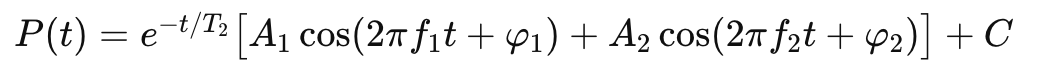

In [ ]:
# ==================================================================
# Fit Ramsey beating with *independent* amplitudes for each branch
# Assumes t_ns, expA, expB are defined (from the simulation cell)
# ==================================================================
import numpy as np, matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import rfftfreq, rfft

# ---------- model -------------------------------------------------
def two_amp_cos(t_s, A1, A2, f1, f2, phi1, phi2, T2, C):
    env = np.exp(-t_s / T2)
    return env * (A1*np.cos(2*np.pi*f1*t_s + phi1) +
                  A2*np.cos(2*np.pi*f2*t_s + phi2)) + C

# ---------- initial-guess helper (FFT) ---------------------------
def guess_params(t_ns, y):
    t_s = t_ns * 1e-9
    C0  = y.mean()
    
    y0  = y - C0
    A_guess = 0.5*(y.max()-y.min())
    fs   = rfftfreq(len(t_s), t_s[1]-t_s[0])
    spec = np.abs(rfft(y0))
    idx  = spec.argsort()[-2:][::-1]          # two largest peaks
    f1, f2 = fs[idx]
    return [A_guess, A_guess, f1, f2, 0.0, 0.0, 5e-6, C0]

# ---------- fit both qubits --------------------------------------
t_s = t_ns * 1e-9
p0A = guess_params(t_ns, expA)
p0B = guess_params(t_ns, expB)

bounds = ([0,0,      0,      0, -np.pi, -np.pi,        0, 0],   # lower
          [1,1,  20e6,  20e6,  np.pi,  np.pi,   1e-3, 1])       # upper

pA, _ = curve_fit(two_amp_cos, t_s, expA, p0=p0A,
                  bounds=bounds, maxfev=50000)
pB, _ = curve_fit(two_amp_cos, t_s, expB, p0=p0B,
                  bounds=bounds, maxfev=50000)

# ---------- report ----------------------------------------------
def report(label, p):
    print(f"{label}:  f1 = {p[2]/1e6:.3f} MHz   "
          f"f2 = {p[3]/1e6:.3f} MHz   "
          f"A1 = {p[0]:.2f}  A2 = {p[1]:.2f}   "
          f"T2 = {p[6]*1e6:.1f} µs")

report("Qubit-A", pA)
report("Qubit-B", pB)

# ---------- plots ---------------------------------------
tf_ns = np.linspace(t_ns[0], t_ns[-1], 1600)
fig, ax = plt.subplots(1,2, figsize=(11,4))
for k, (y, p, title) in enumerate(zip((expA, expB),
                                      (pA, pB),
                                      ("Qubit A", "Qubit B"))):
    ax[k].plot(t_ns, y, '.', ms=3, label='data')
    ax[k].plot(tf_ns,
               two_amp_cos(tf_ns*1e-9, *p), lw=1.4, label='fit')
    ax[k].set_title(title +
      (f"\n f₁={p[2]/1e6:.3f} MHz  f₂={p[3]/1e6:.3f} MHz\n"
       f"A₁={p[0]:.2f}  A₂={p[1]:.2f}  T₂={p[6]*1e6:.1f} µs"))
    ax[k].set_xlabel('delay (ns)'); ax[k].set_ylabel('P(e)')
    ax[k].legend()
plt.tight_layout(); plt.show()


# Sample Telegraphic Noise 

In [ ]:
# Q A
plt.figure(figsize=(8, 5))
plt.hist(np.array(expA_t2)*1e6, bins=200, alpha=0.7, color='steelblue', edgecolor='black')
plt.xlabel("us")
plt.ylabel("Count")
plt.title("T2 Q_A")
plt.grid(True)
plt.show()

In [ ]:
# Q B
plt.figure(figsize=(8, 5))
plt.hist(np.array(expB_t2)*1e6, bins=200, alpha=0.7, color='steelblue', edgecolor='black')
plt.xlabel("us")
plt.ylabel("Count")
plt.title("T2 Q_B")
plt.grid(True)
plt.show()

In [ ]:
#sample0, sample1 = sample_bimodal_gaussian2D([10,20],[5,5],[100,160],[10,10],1000000)
mean1 = [50, 50]  # Means for T1 and T2
cov1 = [[100, 80],  # Covariance matrix: diagonal = variances, off-diagonal = correlation
       [80, 100]]
mean2 = [160, 160]  # Means for T1 and T2
cov2 = [[100, 50],  # Covariance matrix: diagonal = variances, off-diagonal = correlation
       [50, 100]]
sample0, sample1 = double_correlated_2d_normal(mean1, cov1, mean2, cov2, num_samples=5000)
#print(sample0[0], sample1[0])
# Create 2D histogram (heatmap)
plt.figure(figsize=(8, 6))
plt.hist2d(sample0, sample1, bins=50, cmap='viridis')
plt.xlabel("T1_A_SAMPLE (us)")
plt.ylabel("expA_t2 (us)")
plt.title("Heatmap of expA_t2 vs T1_A_SAMPLE")
plt.colorbar(label='Counts')
plt.tight_layout()
plt.show()

In [ ]:
# Generate correlated 2D normal distribution
mean = [100, 160]  # Means for T1 and T2
cov = [[100, 80],  # Covariance matrix: diagonal = variances, off-diagonal = correlation
       [80, 100]]

num_samples = 10000
samples = np.random.multivariate_normal(mean, cov, num_samples)
t1_samples = samples[:, 0]
t2_samples = samples[:, 1]

plt.figure(figsize=(8, 6))
plt.hist2d(t1_samples, t2_samples, bins=50, cmap='viridis')
plt.xlabel("T1 (us)")
plt.ylabel("T2 (us)")
plt.title("Correlated 2D Normal Distribution")
plt.colorbar(label='Counts')
plt.tight_layout()
plt.show()

In [ ]:
# Q B
plt.figure(figsize=(8, 5))
plt.hist(np.array(sample0), bins=200, alpha=0.7, color='steelblue', edgecolor='black')
plt.xlabel("us")
plt.ylabel("Count")
plt.title("T2 Q_B")
plt.grid(True)
plt.show()

In [ ]:
# Convert to numpy arrays if needed
expA_t2 = np.array(expA_t2)
T1_A_SAMPLE = np.array(T1_A_SAMPLE)

# Create 2D histogram (heatmap)
plt.figure(figsize=(8, 6))
plt.hist2d(expA_t2, T1_A_SAMPLE, bins=50, cmap='viridis')
plt.ylabel("T1_A_SAMPLE (us)")
plt.xlabel("expA_t2 (us)")
plt.title("Heatmap of expA_t2 vs T1_A_SAMPLE")
plt.colorbar(label='Counts')
plt.tight_layout()
plt.show()

In [ ]:
x = np.linspace(50, 1000, 500)
#y = 1/200 - (1/x)/2
y =1 / (10+(1/x))

plt.figure(figsize=(7, 4))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('1/200 - 1/(x/2)')
plt.title('Plot of 1/200 - 1/(x/2)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
loA = expA_t2[:200]
hiA = expA_t2[200:]
#resA, tlineA = select_periodic(hiA,loA,3,100,12)

loB = expB_t2[:200]
hiB = expB_t2[200:]
#resB, tlineB = select_periodic(hiB,loB,3,100,12)

res, tline = select_periodicCorr(hiA,loA,hiB,loB,3,100,12)
resA = np.array([float(x[0]) for x in res])
resB = np.array([float(x[1]) for x in res])


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(tline, resA*1e6, 'o', alpha=0.7, label='Qubit A')
plt.plot(tline, resB*1e6, 'o', alpha=0.7, label='Qubit B')
plt.xlabel("Time (hr)")
plt.ylabel("T2 (us)")
plt.title("")
plt.legend()
plt.ylim(0, 300)
plt.grid(True)
plt.tight_layout()
plt.show()